<a href="https://colab.research.google.com/github/Suchitra90/My_python_projects/blob/main/Netflix_CapstoneProjet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings to avoid any warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore',ConvergenceWarning)

In [ ]:
# Import dataset
df = pd.read_csv('/content/drive/MyDrive/ratings.csv')

In [ ]:
# Read the content in dataset
df

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
1048570,7120,168,5.0,1175543061
1048571,7120,253,4.0,1175542225
1048572,7120,260,5.0,1175542035
1048573,7120,261,4.0,1175543376


In [ ]:
# Check for data types of dataset
df.dtypes

,0
userId,int64
movieId,int64
rating,float64
timestamp,int64


In [ ]:
# Check for null values in dataset
df.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [ ]:
# Total number of movies
movie_count = df['movieId'].nunique()
movie_count

14026

In [ ]:
# Total number of users who gave ratings
user_count = df['userId'].nunique()
user_count

7120

In [ ]:
# Total number of ratings
rating_count = df['userId'].count()
rating_count

1048575

In [ ]:
# To find the rating separately for different stars
stars = df.groupby('rating')['rating'].count()
stars

,rating
rating,
0.5,13232
1.0,35144
1.5,14029
2.0,74706
2.5,44791
3.0,226202
3.5,112926
4.0,295135
4.5,79848


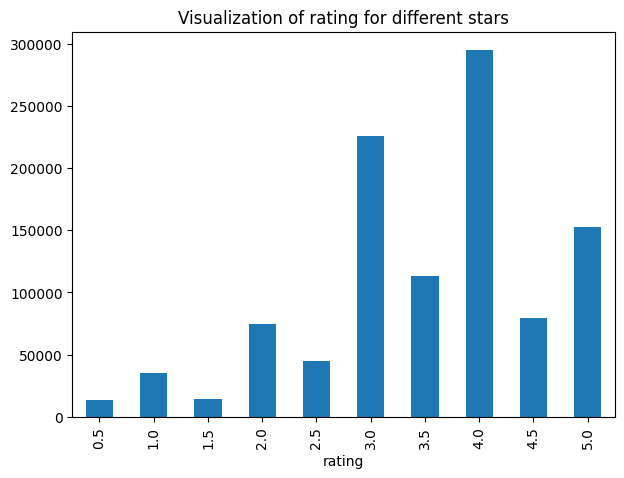

In [ ]:
# Plot the ratings in a bar plot
ax = stars.plot(kind='bar',legend=False,figsize=(7,5))
plt.title('Visualization of rating for different stars')
plt.show()

In [ ]:
# User ratings count
df_user_rating = df.groupby('userId')['rating'].agg(['count'])

In [ ]:
# Set the benchmark so that least rated users are deleted
user_benchmark = round(df_user_rating['count'].quantile(0.6),0)
drop_user_data = df_user_rating[df_user_rating['count']<user_benchmark].index

In [ ]:
# Movie ratings count
df_movie_rating = df.groupby('movieId')['rating'].agg(['count'])
df_movie_rating

,count
movieId,
1,2569
2,1155
3,685
4,138
5,657
...,...
130073,1
130219,1
130462,1


In [ ]:
# Similarly set benchmark for movies also
movies_benchmark = round(df_movie_rating['count'].quantile(0.6),0)
drop_movies_list = df_movie_rating[df_movie_rating['count']<movies_benchmark].index
drop_movies_list

Index([    33,     37,     49,     51,     53,     56,     59,     67,     77,
           84,
       ...
       129350, 129354, 129428, 129707, 130052, 130073, 130219, 130462, 130490,
       130642],
      dtype='int64', name='movieId', length=8337)

In [ ]:
# Make a copy of dataset and remove
df_copy = df.copy()

In [ ]:
# Removing the movies and users who are below benchmark
df_copy = df_copy[~df_copy['movieId'].isin(drop_movies_list)]
df_copy = df_copy[~df_copy['userId'].isin(drop_user_data)]

In [ ]:
df_copy

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
1048460,7117,2133,3.0,903103332
1048461,7117,2134,5.0,903104195
1048462,7117,2136,4.0,903113362
1048463,7117,2161,3.0,903102706


In [ ]:
# Import movies dataset
movie_df = pd.read_csv('/content/drive/MyDrive/movies.csv')
movie_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [ ]:
# Split the genres columns
movie_df['genres'] = movie_df['genres'].str.split('|')
movie_df = movie_df.explode('genres')
movie_df = movie_df[~movie_df['movieId'].isin(drop_movies_list)]
movie_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)
27277,131262,Innocence (2014),Adventure
27277,131262,Innocence (2014),Fantasy


In [ ]:
# Merge both the dataset
merged_df = pd.merge(df_copy,movie_df,on='movieId')
merged_df

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure
1,1,2,3.5,1112486027,Jumanji (1995),Children
2,1,2,3.5,1112486027,Jumanji (1995),Fantasy
3,1,29,3.5,1112484676,"City of Lost Children, The (Cité des enfants p...",Adventure
4,1,29,3.5,1112484676,"City of Lost Children, The (Cité des enfants p...",Drama
...,...,...,...,...,...,...
2196043,7117,2161,3.0,903102706,"NeverEnding Story, The (1984)",Children
2196044,7117,2161,3.0,903102706,"NeverEnding Story, The (1984)",Fantasy
2196045,7117,5060,5.0,903103190,M*A*S*H (a.k.a. MASH) (1970),Comedy
2196046,7117,5060,5.0,903103190,M*A*S*H (a.k.a. MASH) (1970),Drama


Find out the list of most popular and liked genre

In [ ]:
# Most Popular genre
most_popular_genres = merged_df.groupby('genres')['rating'].count().sort_values(ascending=False)
most_popular_genres.head()

,rating
genres,
Drama,360942
Comedy,314343
Action,231783
Thriller,218185
Adventure,180831


In [ ]:
# Most liked genre
most_liked_genre = merged_df.groupby('genres')['rating'].mean().sort_values(ascending=False)
most_liked_genre.head()

,rating
genres,
Film-Noir,3.958643
Documentary,3.805138
War,3.792856
Drama,3.664000
Crime,3.662037


Create Model that finds the best suited Movie for one
user in every genre.

In [ ]:
# Install Surprise Library
! pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 12.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2469553 sha256=a30c4370afd5db1c13932743aad96ef6d241aecb838f040b225196834f14ec0d
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
# Import required libraries
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate

In [ ]:
# For the above code if there is any error we can resolve by running this code
import subprocess
import os
import sys
def install_surprise_fix():
    try:
         # Step 1: Uninstall NumPy and scikit-surprise
         print("Uninstalling existing NumPy and scikit-surprise...")
         subprocess.check_call([sys.executable, "-m", "pip", "uninstall", "-y", "numpy", "scikit-surprise"])
         # Step 2: Install a compatible NumPy version (1.23.5)
         print("Installing NumPy 1.23.5...")
         subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy==1.23.5"])
         # Step 3: Install scikit-surprise without cache
         print("Installing scikit-surprise...")
         subprocess.check_call([sys.executable, "-m", "pip", "install", "--no-cache-dir", "scikit-surprise"])
         # Step 4: Restart kernel (for Jupyter or Colab)
         print("Restarting kernel to apply changes...")
         os._exit(0) # Force restart in Jupyter/Colab
    except Exception as e:
           print(f"Error: {e}")
# Run the fix
install_surprise_fix()

Uninstalling existing NumPy and scikit-surprise...
Installing NumPy 1.23.5...
Installing scikit-surprise...


In [ ]:
# Creating SVD Model and train it
reader = Reader()
data = Dataset.load_from_df(df_copy[['userId','movieId','rating']][:100000],reader)
model = SVD()
cross_validate(model,data,measures=['RMSE'],cv=3)

{'test_rmse': array([0.91466783, 0.90141212, 0.91878788]),
 'fit_time': (1.0223798751831055, 1.0309391021728516, 1.0271949768066406),
 'test_time': (0.28523850440979004, 0.33284831047058105, 0.16273808479309082)}

Recommendation

In [ ]:
# Creating a function so that we can estimate the ratings for any user
def Estimate_movies(userid):

  # List of user rated movies
  user_rated_movies = df_copy[df_copy['userId'] == userid]['movieId'].unique()

  # Separate the movies list which the user = 7115 is not rated and predict the rating for those movies
  unrated_movies = movie_df[~movie_df['movieId'].isin(user_rated_movies)]

  # Predict ratings for unrated movies
  unrated_movies['Estimated_rating'] = unrated_movies['movieId'].apply(lambda x:model.predict(userid,x).est)
  unrated_movies.sort_values('Estimated_rating',ascending=False,inplace=True)

  # Get top movie per genre based on estimated rating
  Best_movies_per_genre = unrated_movies.drop_duplicates('genres')

  # Final Result
  Result = Best_movies_per_genre[['title','genres','Estimated_rating']].reset_index(drop=True)

  return Result

In [ ]:
Estimate_movies(7115)

,title,genres,Estimated_rating
0,"Godfather, The (1972)",Drama,4.409692
1,"Godfather, The (1972)",Crime,4.409692
2,Seven Samurai (Shichinin no samurai) (1954),Adventure,4.367068
3,Seven Samurai (Shichinin no samurai) (1954),Action,4.367068
4,Vertigo (1958),Thriller,4.309641
5,Vertigo (1958),Mystery,4.309641
6,Vertigo (1958),Romance,4.309641
7,Chinatown (1974),Film-Noir,4.282793
8,Wallace & Gromit: The Best of Aardman Animatio...,Animation,4.277136
9,Wallace & Gromit: The Best of Aardman Animatio...,Comedy,4.277136


In [ ]:
user_5001 = Estimate_movies(5001)
user_5001

,title,genres,Estimated_rating
0,"Godfather, The (1972)",Drama,4.409692
1,"Godfather, The (1972)",Crime,4.409692
2,Seven Samurai (Shichinin no samurai) (1954),Adventure,4.367068
3,Seven Samurai (Shichinin no samurai) (1954),Action,4.367068
4,"Usual Suspects, The (1995)",Mystery,4.346599
5,"Usual Suspects, The (1995)",Thriller,4.346599
6,Vertigo (1958),Romance,4.309641
7,Chinatown (1974),Film-Noir,4.282793
8,Wallace & Gromit: The Best of Aardman Animatio...,Animation,4.277136
9,Wallace & Gromit: The Best of Aardman Animatio...,Comedy,4.277136


Find what Genre Movies have received the best and
worst ratings based on User Rating.

In [ ]:
genre_avg_rating = merged_df.groupby('genres')['rating'].agg(['mean']).sort_values('mean',ascending=False)
best_genres = genre_avg_rating.head()
worst_genres = genre_avg_rating.tail()

In [ ]:
best_genres

,mean
genres,
Film-Noir,3.958643
Documentary,3.805138
War,3.792856
Drama,3.664000
Crime,3.662037


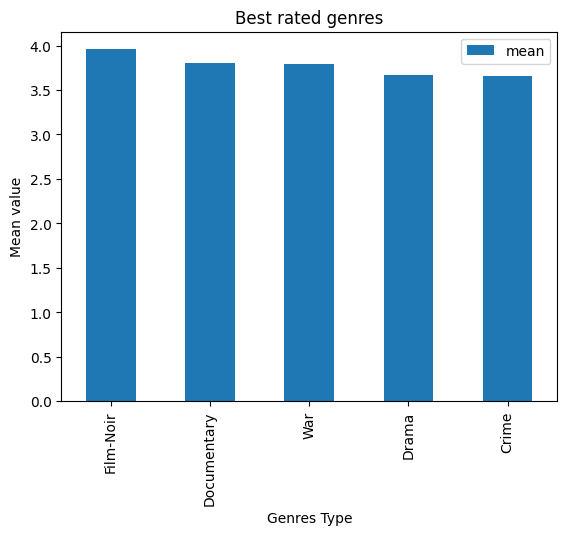

In [ ]:
ax = best_genres.plot(kind='bar')
plt.xlabel('Genres Type')
plt.ylabel('Mean value')
plt.title('Best rated genres')
plt.show()

In [ ]:
worst_genres

,mean
genres,
Action,3.422056
Comedy,3.419333
Sci-Fi,3.412003
Children,3.382871
Horror,3.263553


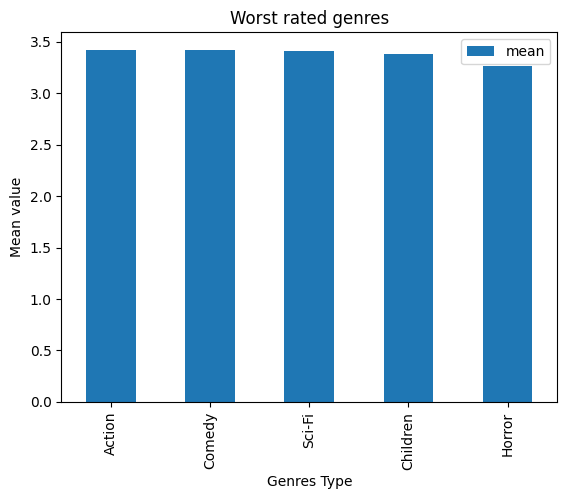

In [ ]:
ax = worst_genres.plot(kind='bar')
plt.xlabel('Genres Type')
plt.ylabel('Mean value')
plt.title('Worst rated genres')
plt.show()